<a href="https://colab.research.google.com/github/jonatasnegreiro/AutoDock_Vina_v_1.1.2./blob/main/Pipeline_do_Autodock_Vina_1_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# ***Pipeline* de *Docking* Molecular com Autodock Vina versão 1.1.2**

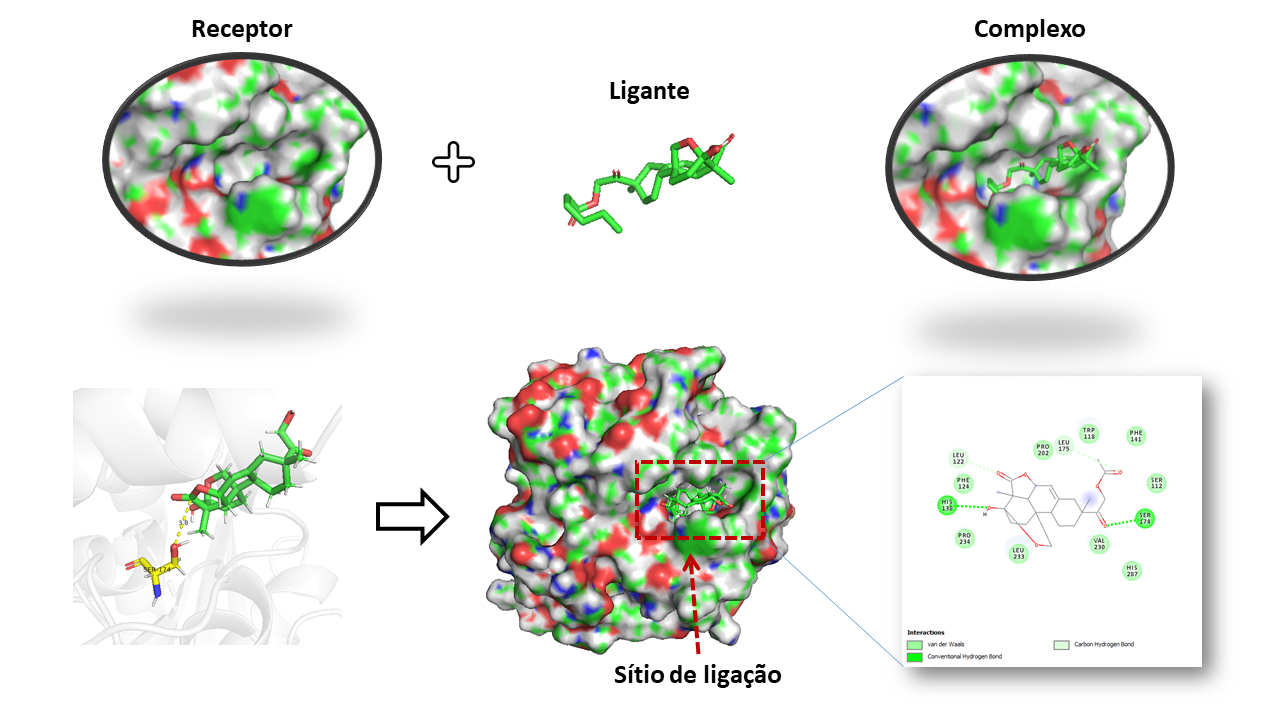


# **Preparação – Instale os pacotes necessários**


Utilizaremos as seguintes bibliotecas e ferramentas para realizar as tarefas mencionadas:


**Biopython:** Esta biblioteca será utilizada para a manipulação dos arquivos PDB, permitindo o acesso e processamento das estruturas moleculares.

**Py3Dmol:** Será empregado para a visualização interativa da estrutura da proteína e para configurar a grade de pesquisa utilizada no processo de *docking*.

**Miniconda:** Utilizaremos esta versão minimalista e gratuita do Conda para facilitar o gerenciamento dos pacotes de software e ambientes necessários ao projeto.

**OpenBabel:** Essa ferramenta será empregada para a parametrização do(s) ligante(s), preparando-os para a etapa de *docking*.

**MGLtools:** Será utilizado para parametrizar a proteína alvo, empregando as cargas de Gasteiger, essenciais para o processo de *docking*.

**PDB2PQR:** Neste pipeline, o PDB2PQR será empregado para realizar a parametrização da proteína, tornando-a pronta para a etapa de *docking*.

**Autodock Vina:** Esta ferramenta será utilizada para executar o processo de atracamento molecular, possibilitando a predição das interações ligante-proteína.

*Após realizar uma série de testes, chegamos à seguinte configuração recomendada para o ambiente Google Colab neste laboratório*

A instalação dos pacotes Biopython, Py3Dmol e PDB2PQR pode ser feita da seguinte forma:

In [1]:
!pip install py3Dmol
!pip install biopython
!pip install pdb2pqr
!pip install kora
!pip install rdkit-pypi
!pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 32.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.2/208.2 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.5/575.5 kB 24.8 MB/s eta 0:00:00
  Attempting uninstall: docutils
    Found existing installation: docutils 0.18.1
    Uninstalling docutils-0.18.1:
      Successfully uninstalled docutils-0.18.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 37.5 MB/s eta 0:00:00


In [2]:
# Importando py3Dmol para visualização interativa de estruturas moleculares em 3D
import py3Dmol

In [3]:
# Verificando se pdb2pqr foi instalado corretamente
!pdb2pqr30 -h

usage: pdb2pqr [-h] [--ff {AMBER,CHARMM,PARSE,TYL06,PEOEPB,SWANSON}] [--userff USERFF] [--clean]
               [--nodebump] [--noopt] [--keep-chain] [--assign-only]
               [--ffout {AMBER,CHARMM,PARSE,TYL06,PEOEPB,SWANSON}] [--usernames USERNAMES]
               [--apbs-input APBS_INPUT] [--pdb-output PDB_OUTPUT] [--ligand LIGAND]
               [--whitespace] [--neutraln] [--neutralc] [--drop-water] [--include-header]
               [--titration-state-method {propka}] [--with-ph PH] [-f FILENAMES] [-r REFERENCE]
               [-c CHAINS] [-i TITRATE_ONLY] [-t THERMOPHILES] [-a ALIGNMENT] [-m MUTATIONS]
               [-p PARAMETERS] [--log-level {DEBUG,INFO,WARNING,ERROR,CRITICAL}] [-o PH]
               [-w WINDOW WINDOW WINDOW] [-g GRID GRID GRID] [--mutator MUTATOR]
               [--mutator-option MUTATOR_OPTIONS] [-d] [-l] [-k] [-q] [--protonate-all]
               [--version]
               input_path output_pqr

PDB2PQR v3.6.1: biomolecular structure conversion softwa

Vamos instalar o miniconda para poder instalar OpenBabel e MGLtools

In [4]:
#@title Instalando Miniconda usando a biblioteca conda-colab

#@markdown ⚠️⏰ Pode demorar cerca de 3 minutos!

#@markdown 📢 A sessão será reiniciada automaticamente após esta célula, ignore qualquer erro.

!pip install -q condacolab
import condacolab
condacolab.install()


⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:16
🔁 Restarting kernel...


In [1]:
#@title Configurando o caminho para o Miniconda

#@markdown ⚠️⏰ Pode demorar cerca de 5 minutos!

import sys
sys.path.append('/root/miniconda3/lib/python3.7/site-packages')

!conda install -c conda-forge -c bioconda mgltools openbabel zlib --yes

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.9.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.9.0



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - mgltools
    - openbabel
    - zlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.7.22  |       hbcca054_0         146 KB  conda-forge
    cairo-1.18.0               |       h3faef2a_0         959 KB  conda-forge
    certifi-2023.7.22          |     pyhd8ed1ab_0         150 KB  conda-forge
    expat-2.

Finalmente, baixe e instale o Autodock Vina

In [2]:
# Baixando e extraindo o Autodock Vina do SCRIPPS
# Em seguida, configuramos um alias para o vina ser tratado como um binário nativo
%%bash
wget https://vina.scripps.edu/wp-content/uploads/sites/55/2020/12/autodock_vina_1_1_2_linux_x86.tgz
tar xzvf autodock_vina_1_1_2_linux_x86.tgz
rm autodock_vina_1_1_2_linux_x86.tgz

autodock_vina_1_1_2_linux_x86/
autodock_vina_1_1_2_linux_x86/LICENSE
autodock_vina_1_1_2_linux_x86/bin/
autodock_vina_1_1_2_linux_x86/bin/vina
autodock_vina_1_1_2_linux_x86/bin/vina_split


--2023-10-26 13:47:01--  https://vina.scripps.edu/wp-content/uploads/sites/55/2020/12/autodock_vina_1_1_2_linux_x86.tgz
Resolving vina.scripps.edu (vina.scripps.edu)... 192.26.252.19
Connecting to vina.scripps.edu (vina.scripps.edu)|192.26.252.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1238242 (1.2M) [application/x-gzip]
Saving to: ‘autodock_vina_1_1_2_linux_x86.tgz’

     0K .......... .......... .......... .......... ..........  4%  349K 3s
    50K .......... .......... .......... .......... ..........  8%  353K 3s
   100K .......... .......... .......... .......... .......... 12% 39.2M 2s
   150K .......... .......... .......... .......... .......... 16%  722K 2s
   200K .......... .......... .......... .......... .......... 20% 85.5M 1s
   250K .......... .......... .......... .......... .......... 24%  115M 1s
   300K .......... .......... .......... .......... .......... 28%  217M 1s
   350K .......... .......... .......... .......... .......... 

In [3]:
# Configurando o caminho para o Autodock Vina
import os
os.environ['PATH'] += ":/content/autodock_vina_1_1_2_linux_x86/bin"

In [4]:
# Verificando se o Autodock Vina foi instalado corretamente
!vina --help


Input:
  --receptor arg        rigid part of the receptor (PDBQT)
  --flex arg            flexible side chains, if any (PDBQT)
  --ligand arg          ligand (PDBQT)

Search space (required):
  --center_x arg        X coordinate of the center
  --center_y arg        Y coordinate of the center
  --center_z arg        Z coordinate of the center
  --size_x arg          size in the X dimension (Angstroms)
  --size_y arg          size in the Y dimension (Angstroms)
  --size_z arg          size in the Z dimension (Angstroms)

Output (optional):
  --out arg             output models (PDBQT), the default is chosen based on 
                        the ligand file name
  --log arg             optionally, write log file

Misc (optional):
  --cpu arg                 the number of CPUs to use (the default is to try to
                            detect the number of CPUs or, failing that, use 1)
  --seed arg                explicit random seed
  --exhaustiveness arg (=8) exhaustiveness of the glo

# **Parte 1 - Preparação do Receptor**


Nesta etapa, procederemos com a preparação do receptor para o processo de *Redocking*. Siga as instruções abaixo:

1. Baixe o arquivo do receptor no formato PDB da fonte desejada, [clique aqui](https://www.rcsb.org/) e escolha o alvo molecular de interesse.

2. Utilizando a biblioteca py3Dmol, visualize a estrutura da proteína a partir do arquivo PDB baixado.

3. Realize eventuais pré-processamentos, como remoção de água e íons desnecessários, e extraia somente os resíduos proteicos relevantes.

4. Salve a versão modificada do receptor em um novo arquivo PDB e realize a parametrização necessária.

5. Extraia o ligante co-cristalizado, e em seguida, realize a parametrização e obtenção das coordenadas espaciais.

6. Verifique se todos os arquivos necessários estão disponíveis para o processo de *Redocking*.

⚠️📢 Assegure-se de seguir as diretrizes apropriadas para a preparação do receptor, considerando os requisitos específicos do Autodock Vina e seguindo as melhores práticas para a preparação de proteínas para o *docking* molecular.

In [6]:
import urllib.request

#@title **Passo 1. Digite o ID PDB de interesse**
#@markdown Digite o ID PDB da proteína de interesse.

pdb_id = input("Digite o ID PDB: ")

def baixar_pdb(pdb_id):
    url = f"https://files.rcsb.org/download/{pdb_id}.pdb"
    nome_arquivo = f"{pdb_id}.pdb"
    urllib.request.urlretrieve(url, nome_arquivo)
    print(f"O arquivo {nome_arquivo} foi baixado com sucesso!")

baixar_pdb(pdb_id)

Digite o ID PDB: 1eqg
O arquivo 1eqg.pdb foi baixado com sucesso!


In [ ]:
import py3Dmol
import os
from ipywidgets import widgets, interact

#@title Visualizar a Proteína

def visualize_pdb(pdb_filename):
    with open(pdb_filename, 'r') as pdb_file:
        pdb_data = pdb_file.read()

    view = py3Dmol.view(width=800, height=600)
    view.addModel(pdb_data, 'pdb')

    view.setStyle({'cartoon': {'color': 'spectrum'}})

    view.setStyle({'hetflag': True}, {'stick': {}})

    view.setStyle({'resn': 'HOH'}, {'sphere': {'opacity': 0.5}})

    view.setStyle({'hetflag': True, 'resn': '!HOH'}, {'stick': {}})

    view.zoomTo()
    view.show()

pdb_files = [file for file in os.listdir() if file.endswith(".pdb")]

pdb_dropdown = widgets.Dropdown(
    options=pdb_files,
    description='PDB file:',
    style={'description_width': 'initial'}
)
display(pdb_dropdown)

def visualize_selected_pdb(b):
    pdb_filename = pdb_dropdown.value
    visualize_pdb(pdb_filename)

button = widgets.Button(description="Visualizar")
display(button)
button.on_click(visualize_selected_pdb)

Dropdown(description='PDB file:', options=('1eqg.pdb',), style=DescriptionStyle(description_width='initial'), …

Button(description='Visualizar', style=ButtonStyle())

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [11]:
import os
import ipywidgets as widgets
from IPython.display import display

#@title **Passo 2. Extraia residuos não proteicos**
#@markdown Esse processo irá resultar na geração de uma estrutura de proteína limpa, específica para o *docking* molecular.\
#@markdown As cadeias individuais da proteína serão extraídas e salvas em arquivos separados.

pdb_files = [file for file in os.listdir() if file.endswith(".pdb")]

pdb_dropdown = widgets.Dropdown(
    options=pdb_files,
    description='PDB file:',
    style={'description_width': 'initial'}
)
display(pdb_dropdown)

button = widgets.Button(description="Extrair proteína")
display(button)

def separate_chain(pdb_file):
    chains = set()
    with open(pdb_file, 'r') as f:
        for line in f:
            if line.startswith('ATOM'):
                chain_id = line[21]
                chains.add(chain_id)

    file_base = os.path.splitext(pdb_file)[0]

    for chain_id in chains:
        chain_file = f"{file_base}_chain_{chain_id}.pdb"
        with open(chain_file, 'w') as f_out, open(pdb_file, 'r') as f_in:
            for line in f_in:
                if line.startswith('ATOM') and line[21] == chain_id:
                    f_out.write(line)

        print(f"+ Chain {chain_id} extracted from {pdb_file} --> {chain_file}")

def extract_protein(b):
    pdb_file = pdb_dropdown.value
    separate_chain(pdb_file)

button.on_click(extract_protein)

Dropdown(description='PDB file:', options=('1eqg.pdb',), style=DescriptionStyle(description_width='initial'), …

Button(description='Extrair proteína', style=ButtonStyle())

+ Chain B extracted from 1eqg.pdb --> 1eqg_chain_B.pdb
+ Chain A extracted from 1eqg.pdb --> 1eqg_chain_A.pdb


# **Preparação do Alvo Molecular para Formação de Ligações de Hidrogênio com o Ligante**

Neste estágio crucial do *pipeline*, é essencial garantir que o alvo molecular contenha todos os hidrogênios polares necessários para estabelecer ligações de hidrogênio com o ligante. É importante ressaltar que muitas estruturas proteicas disponíveis não possuem hidrogênios atribuídos, o que torna imprescindível adicioná-los para garantir a precisão e efetividade do nosso experimento.

**Realize a adição dos hidrogênios polares à proteína e faça a parametrização com base no pKa de cada aminoácido em um pH desejado, utilizando o campo de força de sua escolha. Essa etapa pode ser feita utilizando o pdb2pqr, seguida pela exclusão dos hidrogênios apolares e conversão do arquivo para o formato PDBQT utilizando o MGLtools.**

No processo mencionado, o pdb2pqr gera um arquivo intermediário chamado PQR, que é uma modificação do formato PDB, permitindo a adição de parâmetros de carga e raio aos dados existentes. Essa informação permanece inalterada durante o uso do MGLtools.


In [12]:
#@title **Passo 3. Parametrizando o alvo molecular utilizando o pdb2pqr e em seguida obtendo o PDBQT com MGLtools**

import os
import shutil

pdb_files = [f for f in os.listdir('.') if f.endswith('.pdb')]

if not pdb_files:
    print("Nenhum arquivo .pdb disponível no diretório.")
else:
    print("Arquivos .pdb disponíveis:")
    for i, pdb_file in enumerate(pdb_files):
        print(f"{i+1}. {pdb_file}")

    selection = input("Digite o número do arquivo .pdb que deseja selecionar: ")

    try:
        selection = int(selection)
        if 1 <= selection <= len(pdb_files):
            chosen_pdb = pdb_files[selection-1]
            print(f"Arquivo selecionado: {chosen_pdb}")

            dock_dir = f"redocking"
            os.makedirs(dock_dir, exist_ok=True)

            ph = input("Digite o pH de trabalho: ")

            force_fields = ['AMBER', 'CHARMM', 'OPLS', 'GROMACS']
            print("Campos de força disponíveis:")
            for i, force_field in enumerate(force_fields):
                print(f"{i+1}. {force_field}")
            force_field_selection = input("Digite o número do campo de força desejado: ")

            try:
                force_field_selection = int(force_field_selection)
                if 1 <= force_field_selection <= len(force_fields):
                    chosen_force_field = force_fields[force_field_selection-1]
                    print(f"Campo de força selecionado: {chosen_force_field}")

                    os.system(f"pdb2pqr30 --ff {chosen_force_field} --chain A --titration-state-method propka --with-ph {ph} {chosen_pdb} {dock_dir}/{chosen_pdb[:-4]}.pqr")

                    os.system(f"prepare_receptor4.py -r {dock_dir}/{chosen_pdb[:-4]}.pqr -o {dock_dir}/{chosen_pdb[:-4]}.pdbqt -A checkhydrogens -U nphs_lps -v")

                    print(f"Arquivo {chosen_pdb[:-4]}.pdbqt gerado com sucesso.")

                else:
                    print("Seleção inválida para o campo de força.")
            except ValueError:
                print("Entrada inválida para o campo de força. Digite um número válido.")

        else:
            print("Seleção inválida para o arquivo .pdb.")
    except ValueError:
        print("Entrada inválida para o arquivo .pdb. Digite um número válido.")

dock_dir = f"redocking"
pdbqt_files = [f for f in os.listdir(dock_dir) if f.endswith('.pdbqt')]

if not pdbqt_files:
    print("Nenhum arquivo .pdbqt disponível no diretório de docking.")
else:
    print("Arquivos .pdbqt disponíveis:")
    for i, pdbqt_file in enumerate(pdbqt_files):
        print(f"{i+1}. {pdbqt_file}")

    selection = input("Digite o número do arquivo .pdbqt que deseja selecionar: ")

    try:
        selection = int(selection)
        if 1 <= selection <= len(pdbqt_files):
            chosen_pdbqt = pdbqt_files[selection-1]
            print(f"Arquivo selecionado: {chosen_pdbqt}")

            shutil.move(f"{dock_dir}/{chosen_pdbqt}", f"{dock_dir}/{chosen_pdbqt}")

            shutil.copy(f"{dock_dir}/{chosen_pdbqt}", chosen_pdbqt)

            print(f"Arquivo {chosen_pdbqt} gerado e salvo no diretório {dock_dir}.")
            print(f"Cópia do arquivo {chosen_pdbqt} criada no diretório atual.")

        else:
            print("Seleção inválida para o arquivo .pdbqt.")
    except ValueError:
        print("Entrada inválida para o arquivo .pdbqt. Digite um número válido.")

Arquivos .pdb disponíveis:
1. 1eqg_chain_B.pdb
2. 1eqg_chain_A.pdb
3. 1eqg.pdb
Digite o número do arquivo .pdb que deseja selecionar: 2
Arquivo selecionado: 1eqg_chain_A.pdb
Digite o pH de trabalho: 7.4
Campos de força disponíveis:
1. AMBER
2. CHARMM
3. OPLS
4. GROMACS
Digite o número do campo de força desejado: 1
Campo de força selecionado: AMBER
Arquivo 1eqg_chain_A.pdbqt gerado com sucesso.
Arquivos .pdbqt disponíveis:
1. 1eqg_chain_A.pdbqt
Digite o número do arquivo .pdbqt que deseja selecionar: 1
Arquivo selecionado: 1eqg_chain_A.pdbqt
Arquivo 1eqg_chain_A.pdbqt gerado e salvo no diretório redocking.
Cópia do arquivo 1eqg_chain_A.pdbqt criada no diretório atual.


In [ ]:
#@title Visualize o alvo PDBQT

import py3Dmol
import os
from ipywidgets import widgets, interact

def visualize_pdb(pdb_filename, representation):
    with open(pdb_filename, 'r') as pdb_file:
        pdb_data = pdb_file.read()

    view = py3Dmol.view(width=800, height=600)
    view.addModel(pdb_data, 'pdb')

    if representation == 'cartoon':
        view.setStyle({'cartoon': {'color': 'spectrum'}})
    elif representation == 'sticks':
        view.setStyle({'stick': {}})

    view.zoomTo()
    view.show()

dock_dir = [dir for dir in os.listdir() if dir.startswith("redocking")]
if not dock_dir:
    print("Diretório de docking não encontrado. Execute o código anterior para criar o diretório.")
    exit()

pdbqt_files = [file for file in os.listdir(dock_dir[0]) if file.endswith(".pdbqt")]

pdbqt_dropdown = widgets.Dropdown(
    options=pdbqt_files,
    description='PDBQT file:',
    style={'description_width': 'initial'}
)
display(pdbqt_dropdown)

representation_dropdown = widgets.Dropdown(
    options=['cartoon', 'sticks'],
    description='Representation:',
    style={'description_width': 'initial'}
)
display(representation_dropdown)

def visualize_selected_pdbqt(b):
    pdbqt_filename = os.path.join(dock_dir[0], pdbqt_dropdown.value)
    representation = representation_dropdown.value
    visualize_pdb(pdbqt_filename, representation)

button = widgets.Button(description="Visualizar")
display(button)
button.on_click(visualize_selected_pdbqt)

Dropdown(description='PDBQT file:', options=('1eqg_chain_A.pdbqt',), style=DescriptionStyle(description_width=…

Dropdown(description='Representation:', options=('cartoon', 'sticks'), style=DescriptionStyle(description_widt…

Button(description='Visualizar', style=ButtonStyle())

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [7]:
#@title **Passo 4. Extrair o ligante co-cristalizado para redocking**
#@markdown Verifique no ***Protein Data Bank* (PDB)** as informações sobre o ligante co-cristalizado.

#@markdown ⚠️ Vá na seção "Small Molecules" > "Ligands" > "ID" e
#@markdown verifique a identificação do ligante.

#@markdown ⚠️ Observe também a cadeia do ligante.


import os
import ipywidgets as widgets
from IPython.display import display


def extract_ligand_residue(pdb_filename, ligand_resname, chain_id=None):
    with open(pdb_filename, 'r') as pdb_file:
        pdb_data = pdb_file.readlines()

    ligand_residues = []

    for line in pdb_data:
        if line.startswith("HETATM"):
            resname = line[17:20].strip()
            chain = line[21]
            if resname == ligand_resname and (chain_id is None or chain == chain_id):
                ligand_residues.append(line)

    return ligand_residues


def write_ligand_pdb(pdb_filename, ligand_residues):
    pdb_basename = os.path.splitext(pdb_filename)[0]
    ligand_pdb_filename = f"{pdb_basename}_ligante.pdb"

    with open(ligand_pdb_filename, 'w') as ligand_pdb_file:
        ligand_pdb_file.writelines(ligand_residues)

    print(f"Arquivo {ligand_pdb_filename} gerado com sucesso!")


pdb_files = [file for file in os.listdir('.') if file.endswith('.pdb')]
pdb_dropdown = widgets.Dropdown(
    options=pdb_files,
    description='Arquivo PDB:'
)

ligand_resname_input = widgets.Text(
    description='Ligante co-cristalizado:'
)

chain_id_input = widgets.Text(
    description='Cadeia do Ligante:'
)

run_button = widgets.Button(description='Extrair')


def run_button_clicked(b):
    pdb_filename = pdb_dropdown.value
    ligand_resname = ligand_resname_input.value
    chain_id = chain_id_input.value

    ligand_residues = extract_ligand_residue(pdb_filename, ligand_resname, chain_id)
    if ligand_residues:
        print("Resíduos do ligante encontrados:")
        for residue in ligand_residues:
            print(residue.strip())
        write_ligand_pdb(pdb_filename, ligand_residues)
    else:
        print("Nenhum resíduo do ligante encontrado para o resíduo e cadeia especificados.")


run_button.on_click(run_button_clicked)

display(pdb_dropdown, ligand_resname_input, chain_id_input, run_button)

Dropdown(description='Arquivo PDB:', options=('1eqg.pdb',), value='1eqg.pdb')

Text(value='', description='Ligante co-cristalizado:')

Text(value='', description='Cadeia do Ligante:')

Button(description='Extrair', style=ButtonStyle())

In [ ]:
#@title Visualize o ligante co-cristalizado
import py3Dmol
import os
from ipywidgets import widgets, interact

def visualize_pdb(pdb_filename):
    with open(pdb_filename, 'r') as pdb_file:
        pdb_data = pdb_file.read()

    view = py3Dmol.view(width=800, height=600)
    view.addModel(pdb_data, 'pdb')

    view.setStyle({'cartoon': {'color': 'spectrum'}})

    view.setStyle({'hetflag': True}, {'stick': {}})

    view.setStyle({'resn': 'HOH'}, {'sphere': {'opacity': 0.5}})

    view.setStyle({'hetflag': True, 'resn': '!HOH'}, {'stick': {}})

    view.zoomTo()
    view.show()

pdb_files = [file for file in os.listdir() if file.endswith(".pdb")]

pdb_dropdown = widgets.Dropdown(
    options=pdb_files,
    description='PDB file:',
    style={'description_width': 'initial'}
)
display(pdb_dropdown)

def visualize_selected_pdb(b):
    pdb_filename = pdb_dropdown.value
    visualize_pdb(pdb_filename)

button = widgets.Button(description="Visualizar")
display(button)
button.on_click(visualize_selected_pdb)

Dropdown(description='PDB file:', options=('1eqg_chain_B.pdb', '1eqg_ligante.pdb', '1eqg_chain_A.pdb', '1eqg.p…

Button(description='Visualizar', style=ButtonStyle())

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [ ]:
#@title **Passo 5. Parametrização do Ligante Co-cristalizado com Definição de pH e Diretório de Destino**
#@markdown Esta célula é responsável pela
#@markdown conversão de arquivos PDB (Protein Data Bank)
#@markdown para arquivos PDBQT (AutoDock), permitindo
#@markdown a especificação de um pH personalizado para as moléculas.

#@markdown *O formato PDBQT é essencial para a execução*
#@markdown *e acoplamentos moleculares usando a ferramenta AutoDock Vina.*

import openbabel
import os
import ipywidgets as widgets
from IPython.display import display
import tkinter as tk
from tkinter import filedialog

def convert_pdb_to_pdbqt(pdb_filename, pdbqt_filename, pH):
    conv = openbabel.OBConversion()
    conv.SetInAndOutFormats("pdb", "pdbqt")

    mol = openbabel.OBMol()
    conv.ReadFile(mol, pdb_filename)

    mol.SetTitle(f"pH={pH:.1f}")

    conv.WriteFile(mol, pdbqt_filename)

pdb_files = [file for file in os.listdir('.') if file.endswith('.pdb')]

pdb_dropdown = widgets.Dropdown(
    options=pdb_files,
    description='Arquivo PDB:'
)

pH_input = widgets.FloatText(
    description='pH:'
)

directory_input = widgets.Text(
    value='redocking',
    description='Diretório de destino:'
)

button = widgets.Button(description='Converter')

def convert_button_clicked(b):
    pdb_filename = pdb_dropdown.value
    pdbqt_filename = pdb_filename.replace('.pdb', '.pdbqt')
    pH = pH_input.value
    destination_directory = directory_input.value

    pdbqt_filepath = os.path.join(destination_directory, pdbqt_filename)

    convert_pdb_to_pdbqt(pdb_filename, pdbqt_filepath, pH)
    print(f"Conversão concluída. Arquivo {pdbqt_filepath} gerado com sucesso!")

button.on_click(convert_button_clicked)

display(pdb_dropdown, pH_input, directory_input, button)

Dropdown(description='Arquivo PDB:', options=('1eqg_chain_B.pdb', '1eqg_ligante.pdb', '1eqg_chain_A.pdb', '1eq…

FloatText(value=0.0, description='pH:')

Text(value='redocking', description='Diretório de destino:')

Button(description='Converter', style=ButtonStyle())

Conversão concluída. Arquivo redocking/1eqg_ligante.pdbqt gerado com sucesso!


/usr/local/lib/python3.10/site-packages/openbabel/__init__.py:14: UserWarning: "import openbabel" is deprecated, instead use "from openbabel import openbabel"
  warnings.warn('"import openbabel" is deprecated, instead use "from openbabel import openbabel"')


In [15]:
#@title **Passo 6. Geração do Arquivo conf.txt com Coordenadas Espaciais**

#@markdown Nesta etapa, é necessário configurar os
#@markdown parâmetros para a criação do arquivo conf.txt,
#@markdown que conterá as coordenadas espaciais para o
#@markdown processo de *docking* molecular.

#@markdown *Você deve especificar a proteína, o receptor, o ligante co-cristalizado e a cadeia*
#@markdown *que serão usados no processo.*
#@markdown *Além disso, é fundamental definir os*
#@markdown *parâmetros de exaustividade (exhaustiveness) e o número de modos (num_modes).*

#@markdown ⚠️ Para encontrar o código de identificação do ligante co-cristalizado
#@markdown vá na seção "Small Molecules" > "Ligands" > "ID", presente no *Protein Data Banck* (PDB).

import ipywidgets as widgets
from IPython.display import display
import os
import shutil

def get_ligand_coordinates(pdb_filename, ligand_resname, chain_id=None):
    with open(pdb_filename, 'r') as pdb_file:
        pdb_data = pdb_file.readlines()

    ligand_coordinates = []

    for line in pdb_data:
        if line.startswith("HETATM"):
            resname = line[17:20].strip()
            chain = line[21]
            if resname == ligand_resname and (chain_id is None or chain == chain_id):
                x = float(line[30:38].strip())
                y = float(line[38:46].strip())
                z = float(line[46:54].strip())
                ligand_coordinates.append((x, y, z))

    return ligand_coordinates

def calculate_grid_parameters(ligand_coordinates, padding=8.0):
    min_x = min(coord[0] for coord in ligand_coordinates)
    max_x = max(coord[0] for coord in ligand_coordinates)
    min_y = min(coord[1] for coord in ligand_coordinates)
    max_y = max(coord[1] for coord in ligand_coordinates)
    min_z = min(coord[2] for coord in ligand_coordinates)
    max_z = max(coord[2] for coord in ligand_coordinates)

    center_x = (max_x + min_x) / 2.0
    center_y = (max_y + min_y) / 2.0
    center_z = (max_z + min_z) / 2.0

    size_x = max_x - min_x + padding
    size_y = max_y - min_y + padding
    size_z = max_z - min_z + padding

    return center_x, center_y, center_z, size_x, size_y, size_z

def generate_conf_file(receptor_pdbqt, ligand_coordinates, padding=8.0, exhaustiveness=16, num_modes=30):
    center_x, center_y, center_z, size_x, size_y, size_z = calculate_grid_parameters(ligand_coordinates, padding)

    conf_data = f"""
receptor = {receptor_pdbqt}
out = out.pdbqt

center_x = {center_x}
center_y = {center_y}
center_z = {center_z}

size_x = {size_x}
size_y = {size_y}
size_z = {size_z}

exhaustiveness = {exhaustiveness}
num_modes = {num_modes}
"""

    return conf_data

def display_conf_file(conf_data):
    print(conf_data)

pdb_files = [file for file in os.listdir('.') if file.endswith('.pdb')]
pdb_dropdown = widgets.Dropdown(
    options=pdb_files,
    description='Arquivo PDB:'
)

receptor_files = [file for file in os.listdir('.') if file.endswith('.pdbqt')]
receptor_dropdown = widgets.Dropdown(
    options=receptor_files,
    description='Receptor PDBQT:'
)

ligand_resname_input = widgets.Text(
    description='Ligante co-cristalizado:'
)

chain_id_input = widgets.Text(
    description='Cadeia do Ligante'
)
exhaustiveness_input = widgets.IntText(
    value=16,
    description='Exhaustiveness:'
)

num_modes_input = widgets.IntText(
    value=30,
    description='Num Modes:'
)

run_button = widgets.Button(description='Executar')

def run_button_clicked(b):
    pdb_filename = pdb_dropdown.value
    receptor_pdbqt = receptor_dropdown.value
    ligand_resname = ligand_resname_input.value
    chain_id = chain_id_input.value
    exhaustiveness = exhaustiveness_input.value
    num_modes = num_modes_input.value

    ligand_coordinates = get_ligand_coordinates(pdb_filename, ligand_resname, chain_id)

    dock_dir = f"redocking"
    os.makedirs(dock_dir, exist_ok=True)

    conf_data = generate_conf_file(receptor_pdbqt, ligand_coordinates, exhaustiveness=exhaustiveness, num_modes=num_modes)

    conf_file_path = os.path.join(dock_dir, 'conf.txt')
    with open(conf_file_path, 'w') as conf_file:
        conf_file.write(conf_data)

    display_conf_file(conf_data)

run_button.on_click(run_button_clicked)

display(pdb_dropdown, receptor_dropdown, ligand_resname_input, chain_id_input, exhaustiveness_input, num_modes_input, run_button)

Dropdown(description='Arquivo PDB:', options=('1eqg_chain_B.pdb', '1eqg_chain_A.pdb', '1eqg.pdb'), value='1eqg…

Dropdown(description='Receptor PDBQT:', options=('1eqg_chain_A.pdbqt',), value='1eqg_chain_A.pdbqt')

Text(value='', description='Ligante co-cristalizado:')

Text(value='', description='Cadeia do Ligante')

IntText(value=16, description='Exhaustiveness:')

IntText(value=30, description='Num Modes:')

Button(description='Executar', style=ButtonStyle())


receptor = 1eqg_chain_A.pdbqt
out = out.pdbqt

center_x = 26.6425
center_y = 33.1055
center_z = 200.23149999999998

size_x = 12.147000000000002
size_y = 13.707000000000004
size_z = 15.914999999999992

exhaustiveness = 16
num_modes = 30



# **Parte 2 - Redocking molecular**

In [ ]:
#@title Mudar o diretorio para o 'Redocking'

import os

dock_dir = "/content/redocking"

os.chdir(dock_dir)

In [ ]:
#@title Obter a lista de arquivos no diretório atual
#@markdown Confira se tem todos os arquivos necessários para rodar o Autodock Vina.

#@markdown **receptor.pdbqt**;

#@markdown **ligante.pdbqt**;

#@markdown **conf.txt**;

import os

files = os.listdir()

for file in files:
    print(file)


1eqg_chain_A.pdbqt
1eqg_ligante.pdbqt
conf.txt
1eqg_chain_A.log
1eqg_chain_A.pqr


In [ ]:
#@title **Passo 7. Geração do Script vina_vs.sh para Executar o AutoDock Vina**
#@markdown Neste passo, vamos criar um script chamado vina_vs.sh e, em seguida, executá-lo para rodar o AutoDock Vina.

import os
import subprocess

current_dir = os.getcwd()

script_filename = os.path.join(current_dir, "vina_vs.sh")

script_content = '''\
#!/bin/bash
for f in *.pdbqt; do
    b=$(basename "$f" .pdbqt)
    echo "Processing ligand $b"
    vina --config conf.txt --ligand "$f" --out "${b}_out.pdbqt" --log "${b}_log.txt"
done
'''

with open(script_filename, 'w') as script_file:
    script_file.write(script_content)

subprocess.run(["chmod", "+x", script_filename])

!bash vina_vs.sh

Processing ligand 1eqg_chain_A
#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 2 CPUs
Reading input ... 

Parse error on line 1 in file "1eqg_chain_A.pdbqt": Unknown or inappropria

**Validação do *Redocking* Molecular através da Análise de Sobreposição e RMSD**

*Nesta etapa do pipeline, procederemos à validação do Redocking molecular por meio de uma análise criteriosa da sobreposição entre as estruturas e do valor do RMSD.*

A sobreposição entre as estruturas obtidas durante o processo de *Redocking* será minuciosamente examinada, e o valor do RMSD será calculado para avaliar a precisão das predições.

Considerando os resultados, se o valor do RMSD for menor que 2.0 Å (Angströms), poderemos afirmar que o *Redocking* foi validado com sucesso.

Essa etapa é crucial para assegurar a confiabilidade das técnicas empregadas e obter insights relevantes sobre a acurácia do *Redocking* molecular realizado. Os resultados obtidos aqui influenciarão diretamente no prosseguimento do *pipeline* e nas conclusões finais do experimento.

In [ ]:
#@title **Passo 8. Extrair as poses do *Redocking***


import os
import ipywidgets as widgets

def extract_poses(file_path, output_directory):
    with open(file_path, 'r') as file:
        content = file.read()

    poses = content.split('MODEL')

    for i, pose in enumerate(poses[1:], start=1):
        pose_content = 'MODEL' + pose

        pose_file_path = os.path.join(output_directory, f'pose_{i}.pdbqt')
        with open(pose_file_path, 'w') as pose_file:
            pose_file.write(pose_content)

        print(f"Pose {i} extraída e salva como {pose_file_path}")

pdbqt_files = [file for file in os.listdir('.') if file.endswith('.pdbqt')]

pdbqt_dropdown = widgets.Dropdown(
    options=pdbqt_files,
    description='Arquivo PDBQT:'
)

output_directory = '.'

button = widgets.Button(description='Extrair Poses')

def extract_button_clicked(b):
    pdbqt_filename = pdbqt_dropdown.value
    file_path = os.path.join('.', pdbqt_filename)
    extract_poses(file_path, output_directory)

button.on_click(extract_button_clicked)

display(pdbqt_dropdown, button)

Dropdown(description='Arquivo PDBQT:', options=('1eqg_chain_A.pdbqt', '1eqg_ligante.pdbqt', '1eqg_ligante_out.…

Button(description='Extrair Poses', style=ButtonStyle())

Pose 1 extraída e salva como ./pose_1.pdbqt
Pose 2 extraída e salva como ./pose_2.pdbqt
Pose 3 extraída e salva como ./pose_3.pdbqt
Pose 4 extraída e salva como ./pose_4.pdbqt
Pose 5 extraída e salva como ./pose_5.pdbqt
Pose 6 extraída e salva como ./pose_6.pdbqt
Pose 7 extraída e salva como ./pose_7.pdbqt
Pose 8 extraída e salva como ./pose_8.pdbqt
Pose 9 extraída e salva como ./pose_9.pdbqt
Pose 10 extraída e salva como ./pose_10.pdbqt
Pose 11 extraída e salva como ./pose_11.pdbqt
Pose 12 extraída e salva como ./pose_12.pdbqt
Pose 13 extraída e salva como ./pose_13.pdbqt


In [ ]:
#@title **Conversão de Arquivos PDBQT para PDB com Adição de Hidrogênios usando OpenBabel**

#@markdown Nesta etapa, realizaremos a conversão dos arquivos selecionados
#@markdown do formato .pdbqt para .pdb utilizando a biblioteca OpenBabel.
#@markdown Além disso, iremos adicionar hidrogênios a esses arquivos, preparando-os
#@markdown para cálculos subsequentes de RMSD (*Root-Mean-Square Deviation*).

import os
import glob
import openbabel

def convert_pdbqt_to_pdb(input_path, output_path):
    pdbqt = openbabel.OBMol()
    conv = openbabel.OBConversion()
    conv.SetInAndOutFormats("pdbqt", "pdb")
    conv.ReadFile(pdbqt, input_path)

    conv.WriteFile(pdbqt, output_path)

    conv = openbabel.OBConversion()
    conv.SetInAndOutFormats("pdb", "pdb")
    mol = openbabel.OBMol()
    conv.ReadFile(mol, output_path)

    mol.AddHydrogens()

    conv.WriteFile(mol, output_path)

arquivos_pdbqt = glob.glob("*.pdbqt")

if not arquivos_pdbqt:
    print("Nenhum arquivo .pdbqt encontrado no diretório de trabalho.")
    exit()

print("Arquivos .pdbqt disponíveis para conversão:")
for i, arquivo in enumerate(arquivos_pdbqt, 1):
    print(f"{i}. {arquivo}")

opcoes = input("Digite o número correspondente ao(s) arquivo(s) .pdbqt que deseja converter (separados por vírgula): ")
opcoes = opcoes.split(',')
opcoes = [int(opcao.strip()) for opcao in opcoes]

for opcao in opcoes:
    if opcao not in range(1, len(arquivos_pdbqt) + 1):
        print(f"Opção inválida: {opcao}. Ignorando.")
        continue

    input_file = os.path.abspath(arquivos_pdbqt[opcao - 1])
    file_name_without_ext = os.path.splitext(os.path.basename(input_file))[0]
    output_file = os.path.join(os.getcwd(), file_name_without_ext + "_with_hydrogens.pdb")

    convert_pdbqt_to_pdb(input_file, output_file)

    print(f"Conversão concluída para {arquivos_pdbqt[opcao - 1]}. Arquivo .pdb com hidrogênios salvo como:", output_file)


Arquivos .pdbqt disponíveis para conversão:
1. pose_11.pdbqt
2. pose_2.pdbqt
3. 1eqg_chain_A.pdbqt
4. pose_4.pdbqt
5. 1eqg_ligante.pdbqt
6. pose_1.pdbqt
7. pose_8.pdbqt
8. pose_9.pdbqt
9. pose_6.pdbqt
10. pose_10.pdbqt
11. 1eqg_ligante_out.pdbqt
12. pose_3.pdbqt
13. pose_5.pdbqt
14. pose_7.pdbqt
15. pose_12.pdbqt
16. pose_13.pdbqt
Digite o número correspondente ao(s) arquivo(s) .pdbqt que deseja converter (separados por vírgula): 2, 1, 4, 5, 6
Conversão concluída para pose_2.pdbqt. Arquivo .pdb com hidrogênios salvo como: /content/redocking/pose_2_with_hydrogens.pdb
Conversão concluída para pose_11.pdbqt. Arquivo .pdb com hidrogênios salvo como: /content/redocking/pose_11_with_hydrogens.pdb
Conversão concluída para pose_4.pdbqt. Arquivo .pdb com hidrogênios salvo como: /content/redocking/pose_4_with_hydrogens.pdb
Conversão concluída para 1eqg_ligante.pdbqt. Arquivo .pdb com hidrogênios salvo como: /content/redocking/1eqg_ligante_with_hydrogens.pdb
Conversão concluída para pose_1.pdbqt.

/usr/local/lib/python3.10/site-packages/openbabel/__init__.py:14: UserWarning: "import openbabel" is deprecated, instead use "from openbabel import openbabel"
  warnings.warn('"import openbabel" is deprecated, instead use "from openbabel import openbabel"')


In [ ]:
#@title **Visualizar a Sobreposição do Ligante Co-cristalizado com a Pose do *Redocking* e Calcular o RMSD**

#@markdown Nesta etapa, vamos calcular o RMSD entre o ligante co-cristalizado e a pose do *redocking*.

#@markdown ⚠️ Às vezes, a pose com a melhor energia pode não apresentar o melhor RMSD; certifique-se de verificar as outras poses.

import numpy as np
from Bio import PDB
import tempfile
import os
import ipywidgets as widgets
import glob
import py3Dmol

def align_structures(reference_structure, mobile_structure):
    def filter_heavy_atoms(structure):
        return [atom for atom in structure.get_atoms() if atom.element != "H"]

    fixed_atoms = filter_heavy_atoms(reference_structure)
    moving_atoms = filter_heavy_atoms(mobile_structure)

    super_imposer = PDB.Superimposer()
    super_imposer.set_atoms(fixed_atoms, moving_atoms)
    super_imposer.apply(mobile_structure.get_atoms())

    rmsd = super_imposer.rms

    return rmsd

def load_and_visualize_pdb_files(_):
    reference_file = reference_file_widget.value
    mobile_file = mobile_file_widget.value

    parser = PDB.PDBParser(QUIET=True)
    reference_structure = parser.get_structure("reference", reference_file)
    mobile_structure = parser.get_structure("mobile", mobile_file)

    rmsd = align_structures(reference_structure[0], mobile_structure[0])

    rmsd_filename = "rmsd_info.txt"
    with open(rmsd_filename, "w") as rmsd_file:
        rmsd_file.write(f"Nome do arquivo de referência: {reference_file}\n")
        rmsd_file.write(f"Nome do arquivo móvel: {mobile_file}\n")
        rmsd_file.write(f"RMSD após o alinhamento: {rmsd:.4f} Å")

    temp_pdb_file = tempfile.NamedTemporaryFile(suffix=".pdb", delete=False)
    io = PDB.PDBIO()
    io.set_structure(mobile_structure)
    io.save(temp_pdb_file.name)
    temp_pdb_file.close()

    viewer = py3Dmol.view(width=400, height=400)

    with open(reference_file, 'r') as f:
        viewer.addModel(f.read(), 'pdb')

    with open(temp_pdb_file.name, 'r') as f:
        viewer.addModel(f.read(), 'pdb')

    viewer.setStyle({'stick': {}})
    viewer.zoomTo()
    viewer.show()

    rmsd_label.value = f'RMSD após o alinhamento: {rmsd:.4f} Å'

    os.remove(temp_pdb_file.name)

pdb_files = glob.glob("*.pdb")

reference_file_widget = widgets.Dropdown(options=pdb_files)
mobile_file_widget = widgets.Dropdown(options=pdb_files)

visualize_button = widgets.Button(description="Visualizar")
visualize_button.on_click(load_and_visualize_pdb_files)

rmsd_label = widgets.Label()

widgets.VBox([widgets.Label("Escolha os arquivos .pdb:"), reference_file_widget, mobile_file_widget, visualize_button, rmsd_label])


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [ ]:
#Voltar para o diretório anterior
os.chdir("..")

In [ ]:
#@title Crie um diretório chamado 'docking' e copie os arquivos.
#@markdown 📢 Insira o número correspondente aos arquivos:

#@markdown **receptor.pdbqt e conf.txt**


import os
import shutil

diretorio_origem = '/content/redocking'
diretorio_destino = '/content/docking'

if not os.path.exists(diretorio_origem):
    print("O diretório de origem não existe. Verifique o caminho e tente novamente.")
else:
    if not os.path.exists(diretorio_destino):
        os.mkdir(diretorio_destino)
        print(f"Diretório '{diretorio_destino}' criado com sucesso!")

    arquivos_no_diretorio = os.listdir(diretorio_origem)

    print("Arquivos disponíveis no diretório de origem:")
    for i, arquivo in enumerate(arquivos_no_diretorio, start=1):
        print(f"{i}. {arquivo}")

    escolha = input("Digite os números dos arquivos separados por vírgula (exemplo: 1,2): ")

    numeros_escolhidos = [int(x.strip()) for x in escolha.split(',') if x.strip().isdigit()]

    for numero in numeros_escolhidos:
        if 1 <= numero <= len(arquivos_no_diretorio):
            arquivo_escolhido = arquivos_no_diretorio[numero - 1]
            caminho_origem = os.path.join(diretorio_origem, arquivo_escolhido)
            caminho_destino = os.path.join(diretorio_destino, arquivo_escolhido)
            shutil.copy(caminho_origem, caminho_destino)
            print(f"Arquivo '{arquivo_escolhido}' copiado para o diretório '{diretorio_destino}' com sucesso!")
        else:
            print(f"O número {numero} não corresponde a nenhum arquivo válido.")


Arquivos disponíveis no diretório de origem:
1. pose_11.pdbqt
2. pose_2.pdbqt
3. 1eqg_chain_A.pdbqt
4. pose_4.pdbqt
5. 1eqg_ligante.pdbqt
6. pose_1.pdbqt
7. pose_4_with_hydrogens.pdb
8. 1eqg_ligante_with_hydrogens.pdb
9. pose_11_with_hydrogens.pdb
10. vina_vs.sh
11. pose_8.pdbqt
12. pose_9.pdbqt
13. pose_2_with_hydrogens.pdb
14. conf.txt
15. 1eqg_chain_A_log.txt
16. 1eqg_ligante_log.txt
17. pose_6.pdbqt
18. pose_10.pdbqt
19. 1eqg_ligante_out.pdbqt
20. 1eqg_chain_A.log
21. pose_3.pdbqt
22. 1eqg_chain_A.pqr
23. pose_1_with_hydrogens.pdb
24. rmsd_info.txt
25. pose_5.pdbqt
26. pose_7.pdbqt
27. pose_12.pdbqt
28. pose_13.pdbqt
Digite os números dos arquivos separados por vírgula (exemplo: 1,2): 14
Arquivo 'conf.txt' copiado para o diretório '/content/docking' com sucesso!


**Preparação dos Ligantes para o AutoDock Vina**

Após validar a técnica de *docking* molecular com o *redocking*, vamos agora proceder à preparação dos ligantes para o AutoDock Vina. Siga atentamente as instruções abaixo:

1. Insira o(s) SMILES do(s) ligante(s).

2. Utilize o Openbabel para converter os SMILES em um formato 3D MOL2 e, em seguida, realize uma minimização de energia do conformero utilizando a força de campo GAFF. Posteriormente, faça a conversão para o formato PDBQT, ajustando o pH conforme necessário.

3. Verifique se todos os arquivos necessários para executar o AutoDock Vina estão presentes no diretório de trabalho.

Assegure-se de seguir as diretrizes apropriadas para o preparo do ligante, levando em consideração os requisitos específicos do AutoDock Vina e seguindo as melhores práticas para a preparação dos ligantes para o *docking*.

# **Parte 3 - *Docking* molecular**

In [ ]:
#@title Criar um diretório 'ligands'
#@markdown Insira o codigo SMILES quando solicitado

#@markdown Nomeie o ligante

#@markdown ⚠️📢 Para nomear não utilize caracteres especiais;

#@markdown ⚠️📢 Substitua espaços por "_"


import os
from pathlib import Path

ligandpath = Path("/content/ligands/")

if not os.path.exists(ligandpath):
    os.makedirs(ligandpath)
    print("O caminho dos ligantes foi criado com sucesso")

smiles = input("Digite o SMILES da molécula: ")
nome_arquivo = input("Digite o nome do arquivo (sem extensão): ")

arquivo_path = ligandpath / (nome_arquivo + ".smiles")
arquivo_path.write_text(smiles)

print(f"SMILES salvo com sucesso no arquivo: {arquivo_path}")


Digite o SMILES da molécula: C1CCC(CC1)NC(=O)C2=CC(=O)N(C2)C3CCCCC3
Digite o nome do arquivo (sem extensão): ibuprofeno
SMILES salvo com sucesso no arquivo: /content/ligands/ibuprofeno.smiles


In [ ]:
#@title Use o seguinte visualizador para carregar seus SMILES como uma molécula 3D
#@markdown Visualize os ligantes

import os
import ipywidgets
import py3Dmol
import kora.install.rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from pathlib import Path
import glob

def MolTo3DView(mol, size=(300, 300), style="stick", surface=False, opacity=0.5):
    assert style in ('line', 'stick', 'sphere', 'carton')
    mblock = Chem.MolToMolBlock(mol)
    viewer = py3Dmol.view(width=size[0], height=size[1])
    viewer.addModel(mblock, 'mol')
    viewer.setStyle({style:{}})
    if surface:
        viewer.addSurface(py3Dmol.SAS, {'opacity': opacity})
    viewer.zoomTo()
    return viewer

def smi2conf(smiles):
    '''Convert SMILES to rdkit.Mol with 3D coordinates'''
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        mol = Chem.AddHs(mol)
        AllChem.EmbedMolecule(mol)
        AllChem.MMFFOptimizeMolecule(mol, maxIters=200)
        return mol
    else:
        return None

ligandpath = "/content/ligands"

arquivos_smiles = glob.glob(os.path.join(ligandpath, "*.smiles"))

if not arquivos_smiles:
    print("Nenhum arquivo .smiles encontrado no diretório.")
else:
    dropdown = ipywidgets.Dropdown(
        options=[os.path.basename(file) for file in arquivos_smiles],
        description='Arquivo .smiles:',
    )
    display(dropdown)

def on_visualizar_button_clicked(b):
    arquivo_path = os.path.join(ligandpath, dropdown.value)
    if os.path.exists(arquivo_path):
        smiles = Path(arquivo_path).read_text()
        conf = smi2conf(smiles)
        if conf:
            viewer = MolTo3DView(conf)
            viewer.show()
        else:
            print("Erro ao converter o arquivo .smiles para molécula 3D.")
    else:
        print("O arquivo não existe. Por favor, verifique o nome do arquivo.")

visualizar_button = ipywidgets.Button(description="Visualizar")
visualizar_button.on_click(on_visualizar_button_clicked)
display(visualizar_button)


Dropdown(description='Arquivo .smiles:', options=('fenilbutazona.smiles', 'isatina.smiles', 'ibuprofeno.smiles…

Button(description='Visualizar', style=ButtonStyle())

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [ ]:
#@title **Converter SMILES em MOL2**

#@markdown Essa célula será utilizada para conversão dos SMILES em MOL2 utilizando o Openbabel


# -*- coding: utf-8 -*-
import os

def convert_smiles_to_mol2(input_smiles, output_mol2):
    cmd = "obabel {} -O {} --gen3d --best --canonical --minimize --ff GAFF --steps 10000 --sd".format(input_smiles, output_mol2)
    os.system(cmd)

def main():
    ligands_dir = "/content/ligands"
    smiles_files = [f for f in os.listdir(ligands_dir) if f.endswith('.smiles')]

    if not smiles_files:
        print("Nenhum arquivo .smiles encontrado na pasta /content/ligands.")
        return

    print("Arquivos .smiles encontrados na pasta /content/ligands:")
    for idx, smiles_file in enumerate(smiles_files):
        print("{}. {}".format(idx + 1, smiles_file))

    for smiles_file in smiles_files:
        input_smiles = os.path.join(ligands_dir, smiles_file)
        output_mol2 = os.path.join(ligands_dir, os.path.splitext(smiles_file)[0] + ".mol2")
        convert_smiles_to_mol2(input_smiles, output_mol2)

    print("Conversão e minimização de energia concluídas para todos os arquivos .smiles.")
    print("Os arquivos .mol2 foram salvos na pasta /content.")

if __name__ == "__main__":
    main()


Arquivos .smiles encontrados na pasta /content/ligands:
1. fenilbutazona.smiles
2. isatina.smiles
3. ibuprofeno.smiles
4. aspirina.smiles
5. piroxicam.smiles
Conversão e minimização de energia concluídas para todos os arquivos .smiles.
Os arquivos .mol2 foram salvos na pasta /content.


In [ ]:
#@title **Converter MOL2 em PDBQT**
#@markdown Vamos converter os ligantes utilizando a ferramenta Openbabel em pH de trabalho

import openbabel
import os
import ipywidgets as widgets
from IPython.display import display
import tkinter as tk
from tkinter import filedialog

def convert_mol2_to_pdbqt(mol2_filename, pdbqt_filename, pH):
    conv = openbabel.OBConversion()
    conv.SetInAndOutFormats("mol2", "pdbqt")

    mol = openbabel.OBMol()
    conv.ReadFile(mol, mol2_filename)

    mol.SetTitle(f"pH={pH:.1f}")

    conv.WriteFile(mol, pdbqt_filename)

ligands_dir = '/content/ligands'
mol2_files = [file for file in os.listdir(ligands_dir) if file.endswith('.mol2')]

if not mol2_files:
    print("Nenhum arquivo .mol2 encontrado na pasta /content/ligands.")
else:
    print("Arquivos .mol2 encontrados na pasta /content/ligands:")
    for idx, mol2_file in enumerate(mol2_files):
        print(f"{idx + 1}. {mol2_file}")

    pH_input = widgets.FloatText(
        description='pH:'
    )

    directory_input = widgets.Text(
        value='/content/docking',
        description='Diretório de destino:'
    )

    button = widgets.Button(description='Converter')

    def convert_button_clicked(b):
        pH = pH_input.value
        destination_directory = directory_input.value

        for mol2_file in mol2_files:
            mol2_filepath = os.path.join(ligands_dir, mol2_file)
            pdbqt_filename = mol2_file.replace('.mol2', '.pdbqt')
            pdbqt_filepath = os.path.join(destination_directory, pdbqt_filename)

            convert_mol2_to_pdbqt(mol2_filepath, pdbqt_filepath, pH)
            print(f"Conversão concluída. Arquivo {pdbqt_filepath} gerado com sucesso!")

    button.on_click(convert_button_clicked)

    display(pH_input, directory_input, button)


Arquivos .mol2 encontrados na pasta /content/ligands:
1. ibuprofeno.mol2
2. fenilbutazona.mol2
3. aspirina.mol2
4. piroxicam.mol2
5. isatina.mol2


FloatText(value=0.0, description='pH:')

Text(value='/content/docking', description='Diretório de destino:')

Button(description='Converter', style=ButtonStyle())

Conversão concluída. Arquivo /content/docking/ibuprofeno.pdbqt gerado com sucesso!
Conversão concluída. Arquivo /content/docking/fenilbutazona.pdbqt gerado com sucesso!
Conversão concluída. Arquivo /content/docking/aspirina.pdbqt gerado com sucesso!
Conversão concluída. Arquivo /content/docking/piroxicam.pdbqt gerado com sucesso!
Conversão concluída. Arquivo /content/docking/isatina.pdbqt gerado com sucesso!


/usr/local/lib/python3.10/site-packages/openbabel/__init__.py:14: UserWarning: "import openbabel" is deprecated, instead use "from openbabel import openbabel"
  warnings.warn('"import openbabel" is deprecated, instead use "from openbabel import openbabel"')


In [ ]:
#@title **Mudar para o diretorio de trabalho 'Docking'**


import os

dock_dir = "/content/docking"

os.chdir(dock_dir)

In [ ]:
#@title **Obter a lista de arquivos no diretório atual**
#@markdown Confira se tem todos os arquivos necessários para executar o Autodock Vina.

#@markdown **receptor.pdbqt**;
#@markdown **ligantes.pdbqt**;
#@markdown **conf.txt**;


import os

files = os.listdir()

for file in files:
    print(file)


1eqg_chain_A.pdbqt
piroxicam.pdbqt
isatina.pdbqt
conf.txt
.ipynb_checkpoints
aspirina.pdbqt
fenilbutazona.pdbqt
ibuprofeno.pdbqt


In [ ]:
#@title **Gerar o Script vina_vs.sh para Executar o AutoDock Vina**
#@markdown Neste passo, vamos criar um script chamado vina_vs.sh e, em seguida, executá-lo para rodar o AutoDock Vina.


import os
import subprocess

current_dir = os.getcwd()

script_filename = os.path.join(current_dir, "vina_vs.sh")

script_content = '''\
#! /bin/bash
for f in *.pdbqt; do
    b=`basename $f .pdbqt`
    echo Processing ligand $b
    mkdir -p $b
    vina --config conf.txt --ligand $f --out ${b}/out.pdbqt --log ${b}/log.txt
done

'''

with open(script_filename, 'w') as script_file:
    script_file.write(script_content)

subprocess.run(["chmod", "+x", script_filename])

!bash vina_vs.sh

Processing ligand 1eqg_chain_A
#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 2 CPUs
Reading input ... 

Parse error on line 1 in file "1eqg_chain_A.pdbqt": Unknown or inappropria

In [ ]:
#Voltar para o diretório anterior
os.chdir("..")

**Finalização do *Pipeline* - Salvando o Trabalho no Google Drive**

Agora que concluímos todo o trabalho, é hora de salvar os resultados no Google Drive.

Passo 1: Montar o Google Drive para salvar os arquivos da simulação.

Passo 2: Por favor, substitua o nome padrão "docking_1eqg" pelo nome de sua preferência antes de prosseguir.

Passo 3: É importante notar que existem algumas pastas/arquivos pré-definidas que devem ser **ignoradas**. Caso necessário, atualize essa lista para evitar sobrecarregar seu espaço no Google Drive.

Com essas etapas concluídas, você pode executar a célula e salvar todo o trabalho realizado no Google Drive pessoal para garantir a segurança e o compartilhamento adequado dos resultados obtidos.

In [ ]:
#@title **Montar o Google Drive para salvar seus arquivos**
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Salvar os arquivos no Google Drive pessoal

import zipfile
import os

current_dir = os.getcwd()

# Nome do arquivo zip
zip_filename = "/content/drive/MyDrive/docking_1eqg.zip"

# Lista de pastas a serem ignoradas
ignored_folders = ["condacolab_install.log", "sample_data", ".conf", "autodock_vina_1_1_2_linux_x86", "drive"]

# Função para verificar se um caminho pertence a uma pasta ignorada
def is_ignored(path):
    for folder in ignored_folders:
        if folder in path:
            return True
    return False

# Criação do arquivo zip
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    # Percorre todos os arquivos e subdiretórios do diretório atual
    for root, dirs, files in os.walk(current_dir):
        # Remove as pastas ignoradas da lista de diretórios
        dirs[:] = [d for d in dirs if not is_ignored(os.path.join(root, d))]

        for file in files:
            # Caminho completo para o arquivo
            file_path = os.path.join(root, file)

            if is_ignored(file_path):
                continue

            # Adiciona o arquivo ao arquivo zip
            zipf.write(file_path, os.path.relpath(file_path, current_dir))
            print(f"Arquivo adicionado: {file_path}")

print("Arquivos compactados com sucesso!")


Arquivo adicionado: /content/1eqg_chain_A.pdbqt
Arquivo adicionado: /content/1eqg_chain_B.pdb
Arquivo adicionado: /content/1eqg_ligante.pdb
Arquivo adicionado: /content/1eqg_chain_A.pdb
Arquivo adicionado: /content/1eqg.pdb
Arquivo adicionado: /content/redocking/pose_11.pdbqt
Arquivo adicionado: /content/redocking/pose_2.pdbqt
Arquivo adicionado: /content/redocking/1eqg_chain_A.pdbqt
Arquivo adicionado: /content/redocking/pose_4.pdbqt
Arquivo adicionado: /content/redocking/1eqg_ligante.pdbqt
Arquivo adicionado: /content/redocking/pose_1.pdbqt
Arquivo adicionado: /content/redocking/pose_4_with_hydrogens.pdb
Arquivo adicionado: /content/redocking/1eqg_ligante_with_hydrogens.pdb
Arquivo adicionado: /content/redocking/pose_11_with_hydrogens.pdb
Arquivo adicionado: /content/redocking/vina_vs.sh
Arquivo adicionado: /content/redocking/pose_8.pdbqt
Arquivo adicionado: /content/redocking/pose_9.pdbqt
Arquivo adicionado: /content/redocking/pose_2_with_hydrogens.pdb
Arquivo adicionado: /content/r